In [2]:
import pandas as pd


In [3]:
# Define the file paths
matches_filepath = 'd:/IPL__DATASET/archive/matches.csv'
deliveries_filepath = 'd:/IPL__DATASET/archive/deliveries.csv'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [8]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

print(matches.shape)
print(deliveries.shape)

matches.head()


(1095, 20)
(260920, 17)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [10]:
# Select useful columns
data = matches[["team1","team2","toss_winner","toss_decision","winner","venue"]].dropna()

# Encode categorical values
le = LabelEncoder()
for col in ["team1","team2","toss_winner","toss_decision","winner","venue"]:
    data[col] = le.fit_transform(data[col])
    
X = data.drop("winner", axis=1)
y = data["winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.47706422018348627
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        37
           1       0.50      1.00      0.67         2
           2       0.20      0.14      0.17         7
           3       0.46      0.46      0.46        13
           4       0.50      0.40      0.44         5
           5       0.33      0.11      0.17         9
           6       0.37      0.41      0.39        17
           7       0.00      0.00      0.00         2
           8       0.50      0.52      0.51        23
           9       0.40      0.67      0.50         3
          10       0.50      0.54      0.52        26
          11       0.33      0.33      0.33         3
          12       0.00      0.00      0.00         3
          13       0.56      0.56      0.56        25
          14       0.50      0.25      0.33         4
          16       0.37      0.38      0.38        26
          17       0.00      0.00      0.00        

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

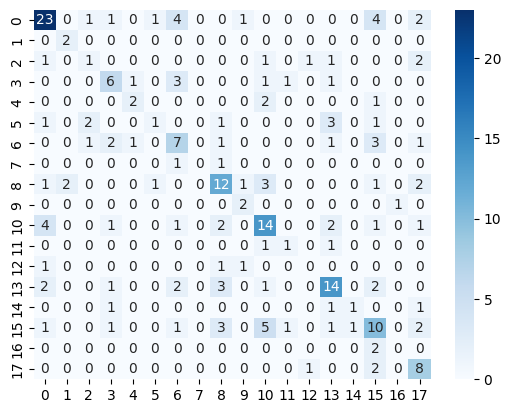

In [11]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()


In [12]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Accuracy (GB):", accuracy_score(y_test, y_pred_gb))


Accuracy (GB): 0.48623853211009177


In [13]:
# Aggregate deliveries to get first innings total runs
first_innings = deliveries.groupby(["match_id","inning"])["total_runs"].sum().reset_index()
first_innings = first_innings[first_innings["inning"]==1]

# Merge with matches
score_data = pd.merge(first_innings, matches, left_on="match_id", right_on="id")

X = score_data[["season","venue"]]  # simple example
y = score_data["total_runs"]

X["venue"] = le.fit_transform(X["venue"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("R^2 Score:", lr.score(X_test, y_test))


C:\Users\tarun\AppData\Local\Temp\ipykernel_3396\2510129084.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["venue"] = le.fit_transform(X["venue"])


ValueError: could not convert string to float: '2007/08'

In [14]:
# Convert season to numeric (extract year)
score_data["season"] = score_data["season"].astype(str).str[:4].astype(int)

# Encode venue (categorical)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
score_data["venue"] = le.fit_transform(score_data["venue"])

# Features and target
X = score_data[["season", "venue"]]
y = score_data["total_runs"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("R^2 Score:", lr.score(X_test, y_test))


R^2 Score: 0.04507293059122219


In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
# Load matches dataset
matches = pd.read_csv("matches.csv")

# Select important features
data = matches[["team1","team2","toss_winner","toss_decision","venue","winner"]].dropna()

# Encode categorical variables
le = LabelEncoder()
for col in ["team1","team2","toss_winner","toss_decision","venue","winner"]:
    data[col] = le.fit_transform(data[col])

# Features and target
X = data.drop("winner", axis=1)
y = data["winner"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
log_reg = LogisticRegression(max_iter=500, solver="lbfgs", multi_class="multinomial")
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.24770642201834864

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.59      0.48        37
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         2
           8       0.19      0.39      0.25        23
           9       0.00      0.00      0.00         3
          10       0.15      0.31      0.20        26
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.29      0.08      0.12        25
          14       0.00      0.00      0.00         4
          16       0.35      0.27      0.30        26
          17       0.00   

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

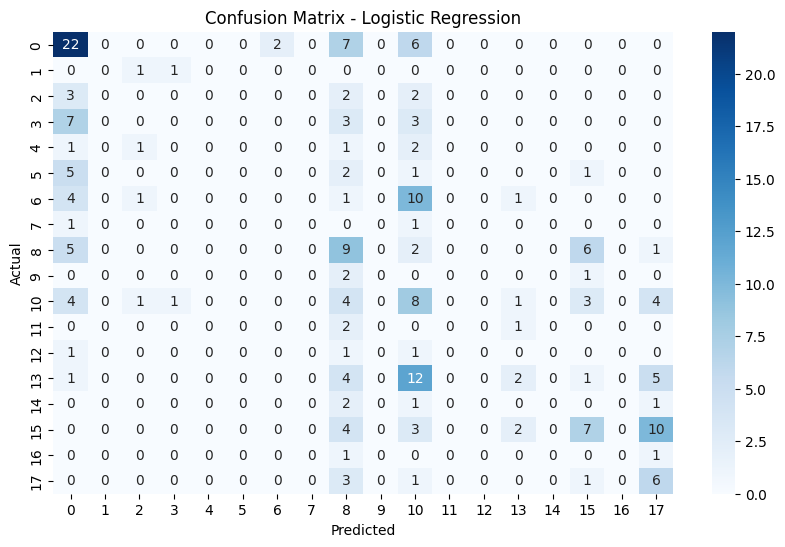

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


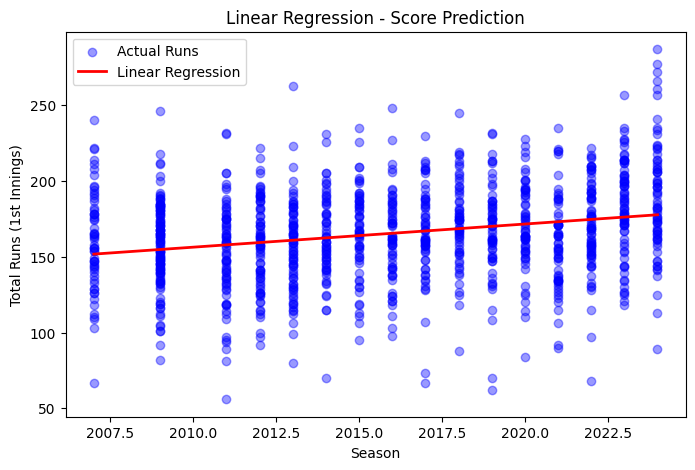

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data
score_data = deliveries.groupby(["match_id","inning"])["total_runs"].sum().reset_index()
score_data = score_data[score_data["inning"]==1]
score_data = pd.merge(score_data, matches, left_on="match_id", right_on="id")

# Fix season column
score_data["season"] = score_data["season"].astype(str).str[:4].astype(int)
score_data["venue"] = LabelEncoder().fit_transform(score_data["venue"])

X = score_data[["season"]]
y = score_data["total_runs"]

# Linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", alpha=0.4, label="Actual Runs")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Regression")
plt.xlabel("Season")
plt.ylabel("Total Runs (1st Innings)")
plt.title("Linear Regression - Score Prediction")
plt.legend()
plt.show()


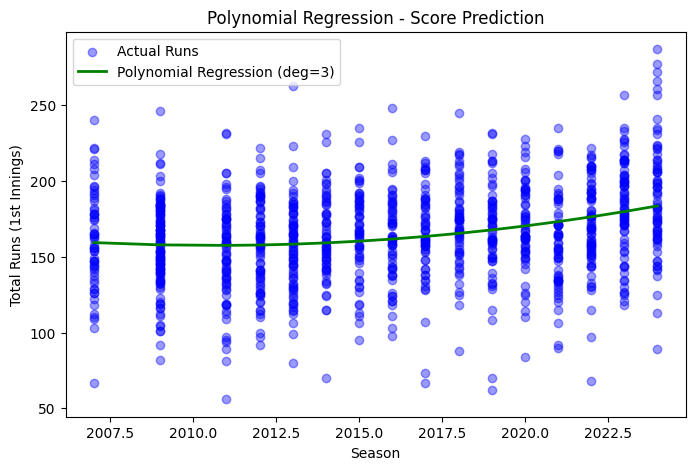

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial regression (degree 3)
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(X, y)
y_poly = poly_model.predict(X)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", alpha=0.4, label="Actual Runs")
plt.plot(X, y_poly, color="green", linewidth=2, label="Polynomial Regression (deg=3)")
plt.xlabel("Season")
plt.ylabel("Total Runs (1st Innings)")
plt.title("Polynomial Regression - Score Prediction")
plt.legend()
plt.show()


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


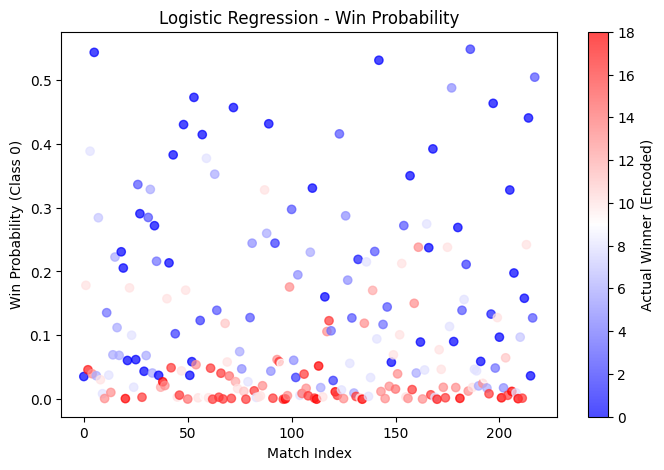

In [22]:
# Features and target
data = matches[["team1","team2","toss_winner","toss_decision","venue","winner"]].dropna()
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("winner", axis=1)
y = data["winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=500, multi_class="multinomial")
log_reg.fit(X_train, y_train)

# Get probabilities for plotting
y_prob = log_reg.predict_proba(X_test)[:,0]   # prob for one class
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_prob)), y_prob, c=y_test, cmap="bwr", alpha=0.7)
plt.xlabel("Match Index")
plt.ylabel("Win Probability (Class 0)")
plt.title("Logistic Regression - Win Probability")
plt.colorbar(label="Actual Winner (Encoded)")
plt.show()


In [24]:
# Prepare data for 1 match example
match_id = 1
df = deliveries[deliveries["match_id"]==match_id]
df1 = df[df["inning"]==1]

# Overs vs cumulative runs
df1["over"] = df1["over"].astype(int)
runs_per_over = df1.groupby("over")["total_runs"].sum().cumsum().reset_index()

X = runs_per_over[["over"]]
y = runs_per_over["total_runs"]

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_pred_lin = lr.predict(X)

# Polynomial Regression
poly = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly.fit(X, y)
y_pred_poly = poly.predict(X)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Actual Runs")
plt.plot(X, y_pred_lin, color="red", label="Linear Regression")
plt.plot(X, y_pred_poly, color="green", label="Polynomial Regression")
plt.xlabel("Overs")
plt.ylabel("Cumulative Runs")
plt.title("Score Prediction per Over")
plt.legend()
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [25]:
# Pick any valid match_id from dataset
match_id = deliveries["match_id"].iloc[0]

df = deliveries[deliveries["match_id"] == match_id]
df1 = df[df["inning"]==1]

# Overs vs cumulative runs
runs_per_over = df1.groupby("over")["total_runs"].sum().cumsum().reset_index()

X = runs_per_over[["over"]]
y = runs_per_over["total_runs"]

print(X.shape, y.shape)   # should not be (0,)


(20, 1) (20,)


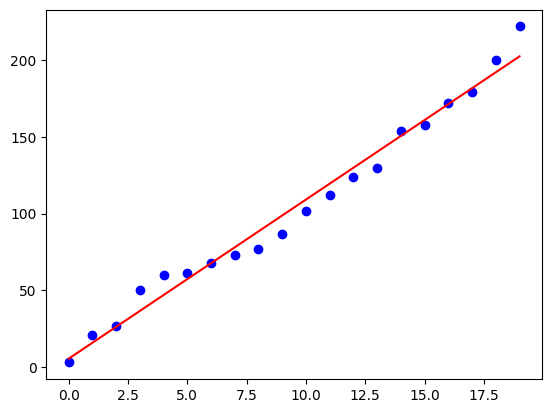

In [26]:
if len(runs_per_over) > 0:
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred_lin = lr.predict(X)

    # plot
    plt.scatter(X, y, color="blue")
    plt.plot(X, y_pred_lin, color="red")
    plt.show()
else:
    print("No data available for this match_id")


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
# Load matches
matches = pd.read_csv("matches.csv")

# Select useful columns
data = matches[["team1","team2","toss_winner","toss_decision","venue","winner"]].dropna()

# Encode categorical variables
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("winner", axis=1)
y = data["winner"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Try K=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.3853211009174312

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.71        37
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.42      0.38      0.40        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.31      0.47      0.37        17
           7       0.00      0.00      0.00         2
           8       0.33      0.39      0.36        23
           9       0.33      0.33      0.33         3
          10       0.34      0.38      0.36        26
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.56      0.36      0.44        25
          14       0.00      0.00      0.00         4
          16       0.35      0.31      0.33        26
          17       0.00

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [30]:
# Try K=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.3853211009174312

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.71        37
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.42      0.38      0.40        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.31      0.47      0.37        17
           7       0.00      0.00      0.00         2
           8       0.33      0.39      0.36        23
           9       0.33      0.33      0.33         3
          10       0.34      0.38      0.36        26
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.56      0.36      0.44        25
          14       0.00      0.00      0.00         4
          16       0.35      0.31      0.33        26
          17       0.00

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

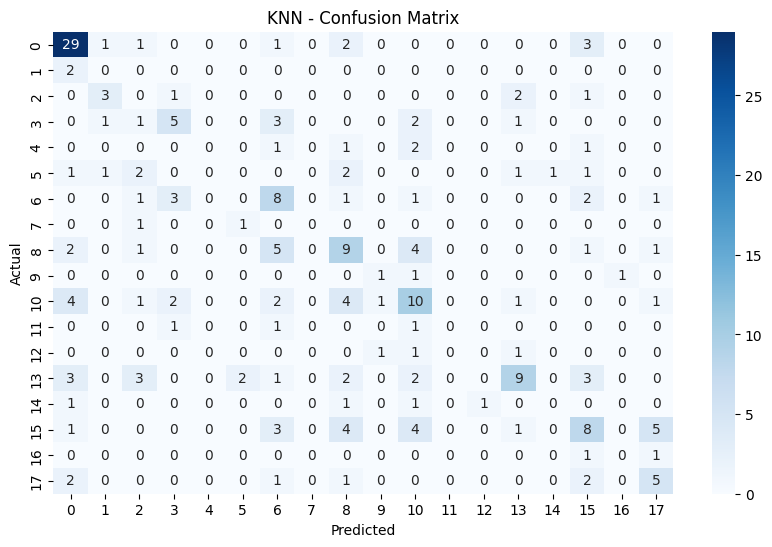

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN - Confusion Matrix")
plt.show()


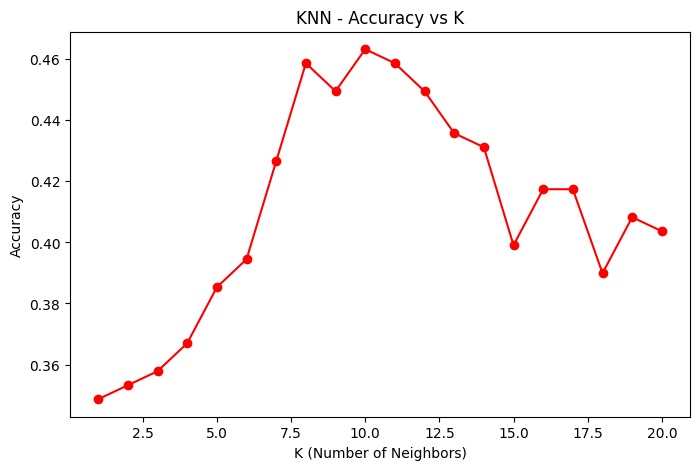

In [32]:
acc_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_scores.append(accuracy_score(y_test, knn.predict(X_test)))

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(range(1,21), acc_scores, marker="o", color="red")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN - Accuracy vs K")
plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, matthews_corrcoef, classification_report
)


In [34]:
# Load matches data
matches = pd.read_csv("matches.csv")

# Select useful columns
data = matches[["team1","team2","toss_winner","toss_decision","venue","winner"]].dropna()

# Encode categorical variables
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Features & Target
X = data.drop("winner", axis=1)
y = data["winner"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
log_reg = LogisticRegression(max_iter=500, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 (macro avg for multi-class)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Error Rate (1 - accuracy)
error_rate = 1 - acc

print("📊 Logistic Regression Evaluation Metrics")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"MCC      : {mcc:.4f}")

# Classification Report (per class)
print("\nDetailed Report:\n", classification_report(y_test, y_pred))


📊 Logistic Regression Evaluation Metrics
Accuracy : 0.2477
Precision: 0.0887
Recall   : 0.1216
F1 Score : 0.0931
Error Rate: 0.7523
MCC      : 0.1532

Detailed Report:
               precision    recall  f1-score   support

           0       0.41      0.59      0.48        37
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         2
           8       0.19      0.39      0.25        23
           9       0.00      0.00      0.00         3
          10       0.15      0.31      0.20        26
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.29      0.08      0.12        25
          14       0

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

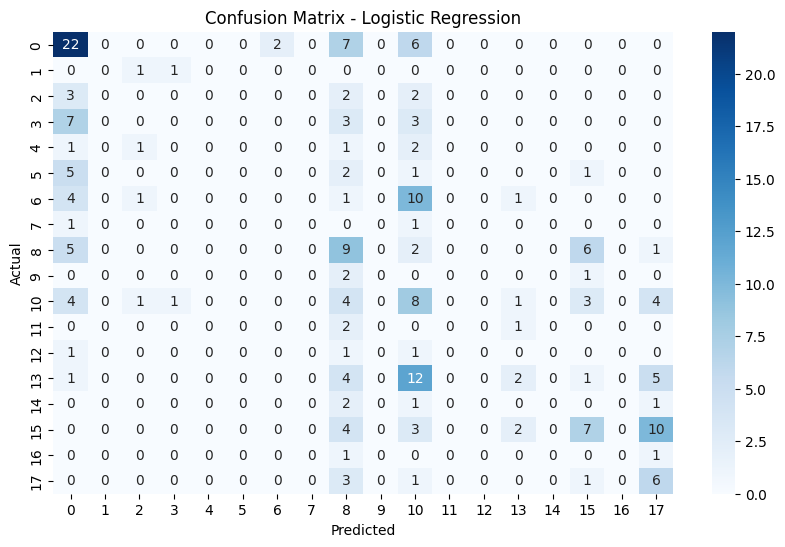

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [43]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
mcc = matthews_corrcoef(y_test, y_pred)
error_rate = 1 - acc

print("📊 KNN Evaluation Metrics")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"MCC       : {mcc:.4f}")

# Detailed Report
print("\nDetailed Report:\n", classification_report(y_test, y_pred))


📊 KNN Evaluation Metrics
Accuracy  : 0.3853
Precision : 0.2027
Recall    : 0.2150
F1 Score  : 0.2057
Error Rate: 0.6147
MCC       : 0.3157

Detailed Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.71        37
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.42      0.38      0.40        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.31      0.47      0.37        17
           7       0.00      0.00      0.00         2
           8       0.33      0.39      0.36        23
           9       0.33      0.33      0.33         3
          10       0.34      0.38      0.36        26
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.56      0.36      0.44        25
          14       0.00      0.

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

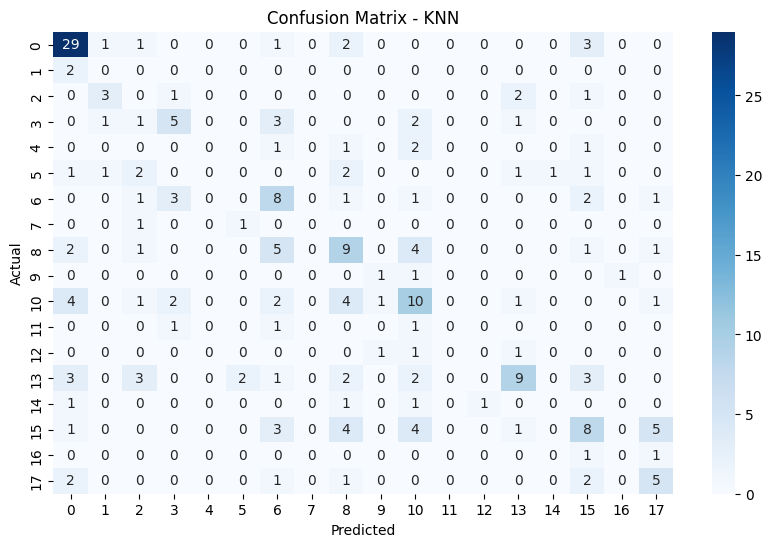

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


In [47]:
# KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

📊 KNN Evaluation Metrics (Cricket Match Prediction)
✅ Accuracy   : 0.3853
✅ Precision  : 0.2027
✅ Recall     : 0.2150
✅ F1 Score   : 0.2057
✅ Error Rate : 0.6147
✅ MCC        : 0.3157

🔍 Detailed Report (Per Team Prediction):
               precision    recall  f1-score   support

           0       0.64      0.78      0.71        37
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.42      0.38      0.40        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.31      0.47      0.37        17
           7       0.00      0.00      0.00         2
           8       0.33      0.39      0.36        23
           9       0.33      0.33      0.33         3
          10       0.34      0.38      0.36        26
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13    

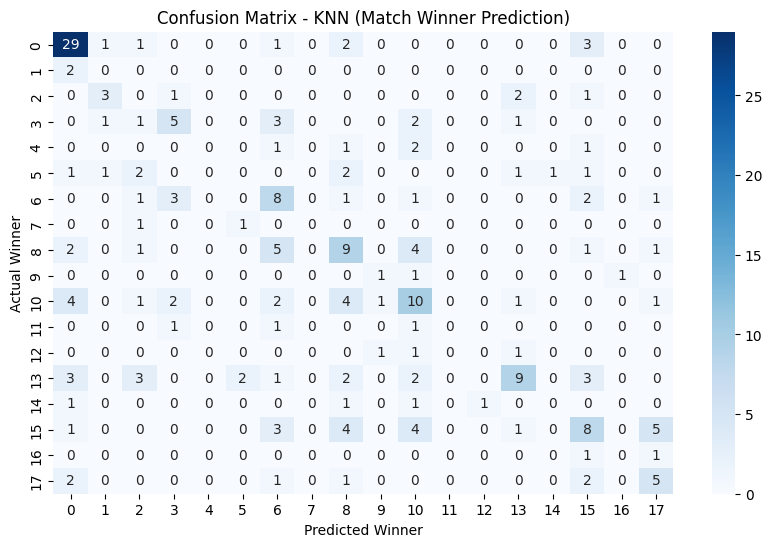

In [1]:
# ============================================
# 📌 K-Nearest Neighbors (KNN) Classifier 
# Real Problem Example: Predicting Cricket Match Winner
# Dataset: IPL matches.csv
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, matthews_corrcoef, classification_report
)

# ============================================
# Step 1: Load the dataset
# ============================================
matches = pd.read_csv("matches.csv")   # ⚡ Real dataset containing IPL match records

# Select relevant features for prediction
# For real-world: winner depends on teams, toss, venue, etc.
data = matches[["team1","team2","toss_winner","toss_decision","venue","winner"]].dropna()

# ============================================
# Step 2: Encode categorical data into numbers
# Because ML models (like KNN) only understand numeric input
# ============================================
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Split features (X) and target (y)
X = data.drop("winner", axis=1)
y = data["winner"]

# Train-test split for real prediction simulation (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================
# Step 3: Train the KNN Classifier
# K=5 means prediction is based on 5 nearest neighbors
# ============================================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict match winners on unseen test data
y_pred = knn.predict(X_test)

# ============================================
# Step 4: Evaluate Model Performance
# Metrics: Accuracy, Precision, Recall, F1, Error Rate, MCC
# ============================================

acc = accuracy_score(y_test, y_pred)              # How many correct predictions
prec = precision_score(y_test, y_pred, average="macro")  # Correct positive predictions
rec = recall_score(y_test, y_pred, average="macro")      # Coverage of actual positives
f1 = f1_score(y_test, y_pred, average="macro")           # Balance between precision & recall
mcc = matthews_corrcoef(y_test, y_pred)                  # Balanced metric even if classes are imbalanced
error_rate = 1 - acc                                     # Wrong predictions

# Print results clearly
print("📊 KNN Evaluation Metrics (Cricket Match Prediction)")
print(f"✅ Accuracy   : {acc:.4f}")
print(f"✅ Precision  : {prec:.4f}")
print(f"✅ Recall     : {rec:.4f}")
print(f"✅ F1 Score   : {f1:.4f}")
print(f"✅ Error Rate : {error_rate:.4f}")
print(f"✅ MCC        : {mcc:.4f}")

# Extra: Detailed per-class report (each team)
print("\n🔍 Detailed Report (Per Team Prediction):\n", classification_report(y_test, y_pred))

# ============================================
# Step 5: Confusion Matrix Visualization
# Helps us see which teams are predicted correctly/wrong
# ============================================
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.title("Confusion Matrix - KNN (Match Winner Prediction)")
plt.show()
